**THE SMOOTHING FILTER AND THE SHARPENING FILTER IN SPATIAL DOMAIN**

INITIALIZATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2

image = cv2.imread('/content/drive/MyDrive/DIP/test.png', 0)

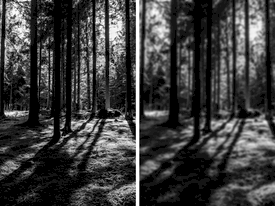

(206, 275)


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
print(image.shape)

**Image Smoothing**

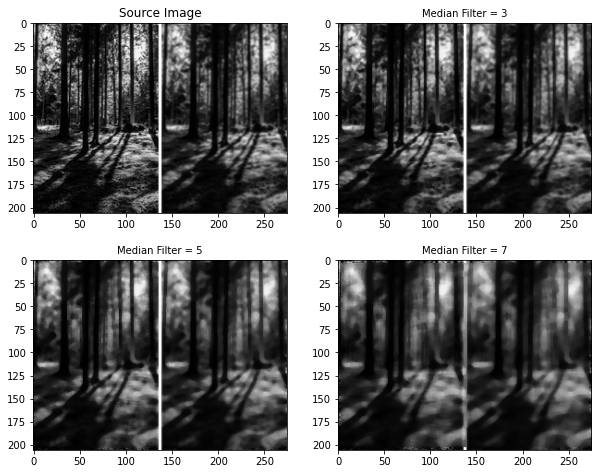

In [ ]:
def for_median(img, i, j, siz):
    h = siz//2
    i2 = i-h; i3 = i+h; i4 = j-h; i5 = j+h

    ret = list()

    for x in range(i2, i3+1):
        for y in range(i4, i5+1):
            ret.append(img[x][y])

    ret = sorted(ret)
    idx = len(ret)//2
    return ret[idx]

def smooth(img, siz):
    img_2= np.array(img)
    r, c = img_2.shape
    img_new = np.zeros((r, c))

    for i in range(0, r):
        for j in range(0, c):
            h = siz//2

            if(i-h<0 or i+h>=r or j-h<0 or j+h>=c):
                img_new[i][j] = img_2[i][j]
                continue

            img_new[i][j] = for_median(img_2, i, j, siz)

    return Image.fromarray(img_new)

img = Image.open("/content/drive/MyDrive/DIP/test.png").convert('L')

plt.figure(figsize = (10,8))
cnt = 1
for siz in [1, 3, 5, 7]:
    img_new = smooth(img, siz)
    
    plt.subplot(2,2,cnt)
    if siz == 1:
        plt.title("Source Image")
    else:    
        plt.title("Median Filter = %d" %siz, fontsize=10)
    plt.imshow(img_new)

    cnt += 1

plt.show()

Image Smoothing is important for reducing noises. here, median filter has been used for image smoothing which consider each pixels and its neighbors.And replace them with median neighbors. 

**low pass filter**

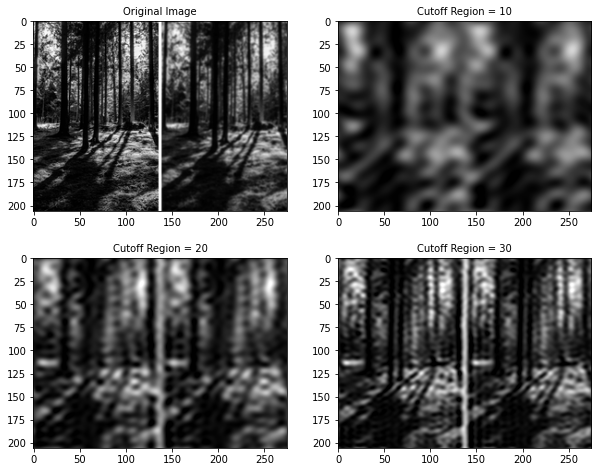

In [ ]:
def DFT(img_ara):
    freq_img = np.fft.fft2(img_ara)
    freq_img = np.fft.fftshift(freq_img)
    return freq_img

def inv_DFT(img_ara):
    img_ara2 = np.fft.ifftshift(img_ara)
    img_ara2 = np.fft.ifft2(img_ara2).real
    return img_ara2

def low_pass_filter(img, siz):
    img_ara = np.array(img)
    freq_img = DFT(img_ara)
    hr = freq_img.shape[0]//2; hc = freq_img.shape[1]//2

    freq_low = np.copy(freq_img)
    freq_low[hr-siz : hr+siz+1, hc-siz : hc+siz+1] = 0
    freq_img =  freq_img - freq_low

    img_ara2 = inv_DFT(freq_img)
    img_ara2 = np.clip(img_ara2, 0, 255)
    return Image.fromarray(img_ara2)

img = Image.open("/content/drive/MyDrive/DIP/test.png").convert('L')

plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
plt.title("Original Image", fontsize=10)
plt.imshow(img.convert('F'))

cnt = 2
for siz in [10, 20, 30]:
    img_new = low_pass_filter(img, siz)
    
    plt.subplot(2,2,cnt) 
    plt.title("Cutoff Region = %d" %siz, fontsize=10)
    plt.imshow(img_new)

    cnt += 1

plt.show()

**High pass Filter**

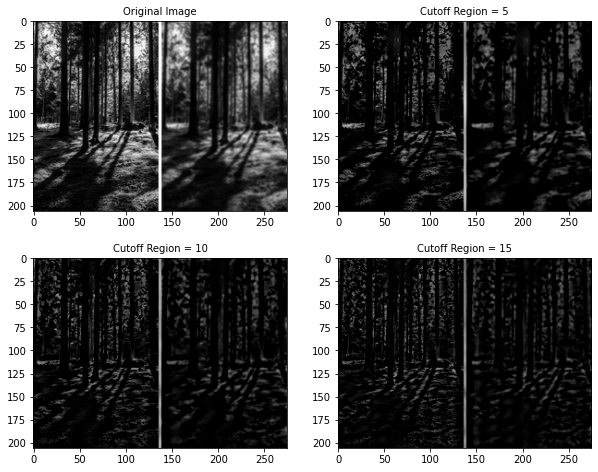

In [ ]:
def DFT(img_ara):
    freq_img = np.fft.fft2(img_ara)
    freq_img = np.fft.fftshift(freq_img)
    return freq_img

def inv_DFT(img_ara):
    img_ara2 = np.fft.ifftshift(img_ara)
    img_ara2 = np.fft.ifft2(img_ara2).real
    return img_ara2

def high_pass_filter(img, siz):
    img_ara = np.array(img)
    freq_img = DFT(img_ara)
    hr = freq_img.shape[0]//2; hc = freq_img.shape[1]//2

    freq_img[hr-siz : hr+siz+1, hc-siz : hc+siz+1] = 0

    img_ara2 = inv_DFT(freq_img)
    img_ara2 = np.clip(img_ara2, 0, 255)
    return Image.fromarray(img_ara2)

img = Image.open("/content/drive/MyDrive/DIP/test.png").convert('L')

plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
plt.title("Original Image", fontsize=10)
plt.imshow(img.convert('F'))

cnt = 2
for siz in [5, 10, 15]:
    img_new = high_pass_filter(img, siz)
    
    plt.subplot(2,2,cnt) 
    plt.title("Cutoff Region = %d" %siz, fontsize=10)
    plt.imshow(img_new)

    cnt += 1

plt.show()

Low pass filtering is used for smoothing the images which attenuates high frequency and preserve low freequency components.

High pass filtering is used in sharpening the images which attenuates low freequncy and preserve high freequency components.
